# Task C: Let's stay together, Circular orbit

In [1]:
import numpy as np
from fireworks.ic import ic_two_body
import matplotlib.pyplot as plt
from fireworks.nbodylib.integrators import integrator_euler, integrator_leapfrog, integrator_rungekutta
from fireworks.nbodylib.dynamics import acceleration_direct_vectorized, acceleration_direct, acceleration_pyfalcon, acceleration_jerk_direct

#from mpl_toolkits.mplot3d import Axes3D

%matplotlib widget

First we have to choose the initial conditions of our system, namely the two masses, the distance $r$ and the eccentricity $e$ (equal to zero since we're working with a circular orbit).

To do so, we use the `fireworks.ic.ic_two_body` method we developed earlier.

In [2]:
mass1 = 1.
mass2 = 2.
rp = 5. 
e = 0               # we're in a circular orbit

part = ic_two_body(mass1, mass2, rp, e)

### Estimate the period

To estimate the period we use:
$$
P = \sqrt{\frac{4\pi^2a^3}{GM}}
$$
Since we're working in Nbody-units we can get rid of the constant $G$ ($G=1$). The semi-major axis $a$ comes from $r_p = a(1-e)$. $M$ is the total mass of the system.

In [3]:
a = rp / (1 - e)
M_tot = np.sum(part.mass)

P = np.sqrt((4 * np.pi**2. * a**3.)/(M_tot))
print(P)

40.55778675973612


Using the initial conditions we gave as input, the period is $P = 40.56$

## Evolution of the binary system

We have now to evolve the binary system from $0$ to $10\cdot P$. To do so we use the three different integrators we implemented: the Euler, the Leapfrog and the Runge-Kutta, along with our function `acceleration_direct_vectorized` to estimate the acceleration. 

### Functions

First we define some functions, one for each integrator (`integration_euler`, `integration_leapfrog` and `integration_rungekutta`) and one for the total energy error (`total_energy_error`).

In [4]:
def integration_euler(part, h, tsimulation, t, N):
    path_1 = []
    path_2 = []
    Etot_euler = []
    Ekin_euler = []
    Epot_euler = []

    while t < tsimulation:
        for j in range(1,N):
            result = integrator_euler(part, h, acceleration_direct_vectorized)
            updated_part, tstep, updated_acc, _, _ = result
            path_1.append(updated_part.pos[0])
            path_2.append(updated_part.pos[1])
            Etot_n, Ekin_n, Epot_n = updated_part.Etot()
            Etot_euler.append(Etot_n)
            Ekin_euler.append(Ekin_n)
            Epot_euler.append(Epot_n)

        t += h

    path_1 = np.array(path_1)
    path_2 = np.array(path_2)
    Etot_euler = np.array(Etot_euler)
    Ekin_euler = np.array(Ekin_euler)
    Etot_euler = np.array(Epot_euler)

    return path_1, path_2, Etot_euler, Ekin_euler, Epot_euler

In [5]:
def integration_leapfrog(part, h, tsimulation, t, N):
    path_1 = []
    path_2 = []
    Etot_leapfrog = []
    Ekin_leapfrog = []
    Epot_leapfrog = []

    while t < tsimulation:
        for j in range(1,N):
            result = integrator_leapfrog(part, h, acceleration_direct_vectorized)
            updated_part, tstep, updated_acc, _, _ = result
            path_1.append(updated_part.pos[0])
            path_2.append(updated_part.pos[1])
            Etot_n, Ekin_n, Epot_n = updated_part.Etot()
            Etot_leapfrog.append(Etot_n)
            Ekin_leapfrog.append(Ekin_n)
            Epot_leapfrog.append(Epot_n)
        

        t += h

    path_1 = np.array(path_1)
    path_2 = np.array(path_2)
    Etot_leapfrog = np.array(Etot_leapfrog)
    Ekin_leapfrog = np.array(Ekin_leapfrog)
    Epot_leapfrog = np.array(Epot_leapfrog)

    return path_1, path_2, Etot_leapfrog, Ekin_leapfrog, Epot_leapfrog

In [6]:
def integration_rungekutta(part, h, tsimulation, t, N):
    path_1 = []
    path_2 = []
    Etot_rungekutta = []
    Ekin_rungekutta = []
    Epot_rungekutta = []

    while t < tsimulation:
        for j in range(1,N):
            result = integrator_rungekutta(part, h, acceleration_direct_vectorized)
            updated_part, tstep, updated_acc, _, _ = result
            path_1.append(updated_part.pos[0])
            path_2.append(updated_part.pos[1])
            Etot_n, Ekin_n, Epot_n = updated_part.Etot()
            Etot_rungekutta.append(Etot_n)
            Ekin_rungekutta.append(Ekin_n)
            Epot_rungekutta.append(Epot_n)
        

        t += h

    path_1 = np.array(path_1)
    path_2 = np.array(path_2)
    Etot_rungekutta = np.array(Etot_rungekutta)
    Ekin_rungekutta = np.array(Ekin_rungekutta)
    Epot_rungekutta = np.array(Epot_rungekutta)

    return path_1, path_2, Etot_rungekutta, Ekin_rungekutta, Epot_rungekutta

In [7]:
def total_energy_error(Etot, t, tsimulation, h):
    energy_error = np.zeros_like(Etot)

    for i in range(len(Etot)):
        energy_error[i] = np.abs((Etot[i] - Etot[0])/Etot[0])

    time = np.arange(0, tsimulation, h)

    return energy_error, time

We can then define the constants that we are going to use in our problem.

In [8]:
h = 0.01                    #timestep 
t = 0                       #initial time of the simulation
tsimulation = 10 * P        #final time of the simulation (10 times the period)
N = 2                       #number of bodies involved in the simulation

## Let's integrate
### Euler

Let's start with `integration_euler`. First we integrate the orbit, and then we can plot the positions of the two bodies.

/root/miniconda3/lib/python3.10/site-packages/fireworks-0.0.5-py3.10.egg/fireworks/nbodylib/dynamics.py:188: RuntimeWarning: invalid value encountered in divide


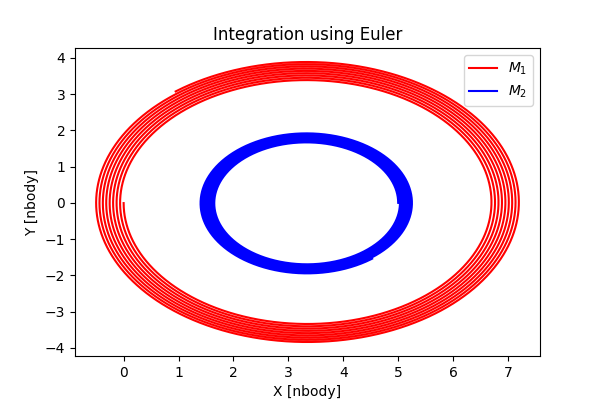

In [9]:
# EULER
part_euler = part.copy()
path1_euler, path2_euler, Etot_euler, Ekin_euler, Epot_euler = integration_euler(part_euler, h, tsimulation, t, N)

# PLOT EULER
plt.figure(figsize=(6,4))
plt.title('Integration using Euler')
plt.plot(path1_euler[:,0], path1_euler[:,1], label=f'$M_1$', color='red')
plt.plot(path2_euler[:,0], path2_euler[:,1], label=f'$M_2$', color='blue')
plt.xlabel('X [nbody]')
plt.ylabel('Y [nbody]')
plt.legend()


We can see that the accuracy is pretty low since it is a fisrt order integrator: even after the first period the lines cease to overlap, and they start to go further apart. The position error is $O(h^2)$. This implies that ths method is not predictive anymore right after a few pediods. 

Then we plot the relative energy as a function of time.

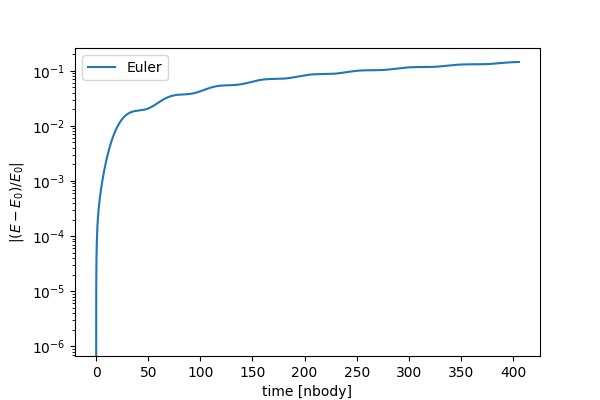

In [10]:
energy_error_euler, time_euler = total_energy_error(Etot_euler, t, tsimulation, h)      #we use the function defined earlier

# ENERGY ERROR PLOT FOR EULER
plt.figure(figsize=(6,4))
plt.plot(time_euler, energy_error_euler, label='Euler')
plt.yscale('log')
plt.xlabel('time [nbody]')
plt.ylabel(f'$|(E-E_0)/E_0|$')
plt.legend()


This is in line with the theoretical expectations. From here we can see rightaway that this integrator is not symplectic.

<div class='alert alert-block alert-warning'>
C'è da dire qualcos'altro? secondo me no... forse giustificare le wiggles ma non mi ricordo come
</div>

### Leapfrog

Now let's use `integration_leapfrog`.

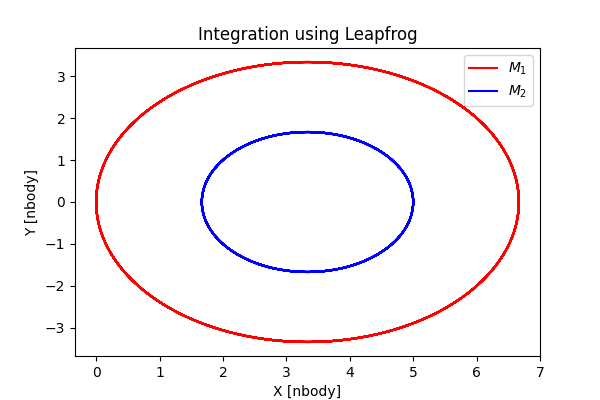

In [11]:
# LEAPFROG
part_leapfrog = part.copy()
path1_leapfrog, path2_leapfrog, Etot_leapfrog, Ekin_leapfrog, Epot_leapfrog = integration_leapfrog(part_leapfrog, h, tsimulation, t, N)

# PLOT LEAPFROG
plt.figure(figsize=(6,4))
plt.title('Integration using Leapfrog')
plt.plot(path1_leapfrog[:,0], path1_leapfrog[:,1], label=f'$M_1$', color='red')
plt.plot(path2_leapfrog[:,0], path2_leapfrog[:,1], label=f'$M_2$', color='blue')
plt.xlabel('X [nbody]')
plt.ylabel('Y [nbody]')
plt.legend()

Being this a second order integrator, the accuracy is higher than the Euler's one. In fact, the position error is now $O(h^3)$. The orbit remains predictive even after 10 periods.

<div class='alert alert-block alert-warning'>
Non sicuro di $O(h^3)$
</div>

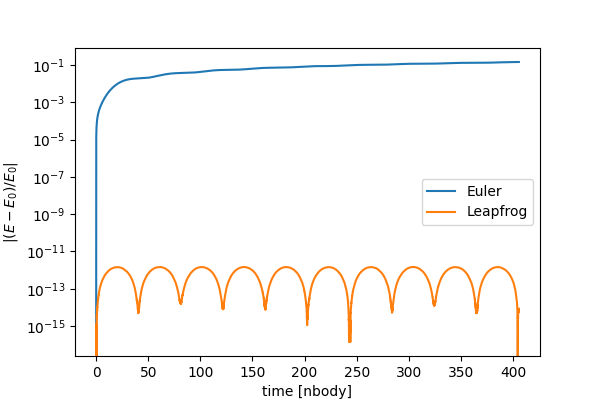

In [12]:
# TOTAL ENERGY ERROR LEAPFROG
energy_error_leapfrog, time_leapfrog = total_energy_error(Etot_leapfrog, t, tsimulation, h)

# ENERGY ERROR PLOT EULER AND LEAPFROG
plt.figure(figsize=(6,4))
plt.plot(time_euler, energy_error_euler, label='Euler')
plt.plot(time_leapfrog, energy_error_leapfrog, label='Leapfrog')
plt.yscale('log')
plt.xlabel('time [nbody]')
plt.ylabel(f'$|(E-E_0)/E_0|$')
plt.legend()

This behaviour is in line with the theoretical expectations. From here we can notice the symplecticity of the Leapfrog method. 

### Runge-Kutta 4th Order

Last but not least, `integration_rungekutta`.

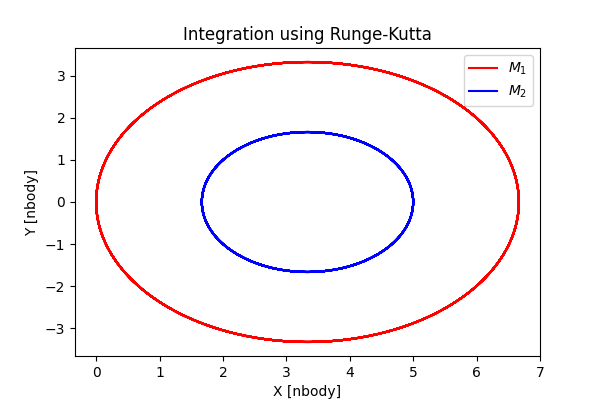

In [13]:
# RUNGE-KUTTA
part_rungekutta = part.copy()
path1_rungekutta, path2_rungekutta, Etot_rungekutta, Ekin_rungekutta, Epot_rungekutta = integration_rungekutta(part_rungekutta, h, tsimulation, t, N)

# PLOT RUNGE-KUTTA
plt.figure(figsize=(6,4))
plt.title('Integration using Runge-Kutta')
plt.plot(path1_rungekutta[:,0], path1_rungekutta[:,1], label=f'$M_1$', color='red')
plt.plot(path2_rungekutta[:,0], path2_rungekutta[:,1], label=f'$M_2$', color='blue')
plt.xlabel('X [nbody]')
plt.ylabel('Y [nbody]')
plt.legend()

This is a forth order integrator. With this method we can achieve the higher precision (with respect to the other two methods at least). The globar error is $O(h^4)$. This method predicts very well the trajectories of the two bodies even after 10 periods. 

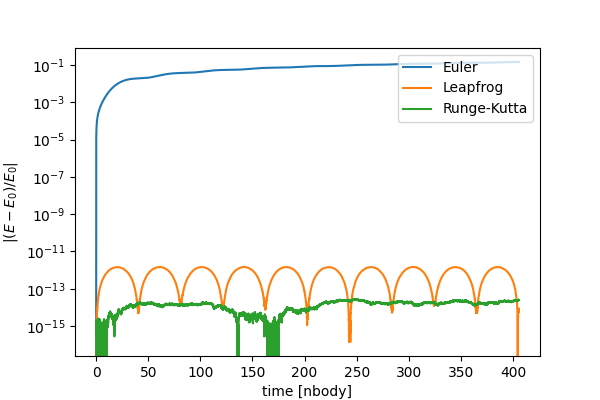

In [14]:
# TOTAL ENERGY ERROR RUNGE-KUTTA
energy_error_rungekutta, time_rungekutta = total_energy_error(Etot_rungekutta, t, tsimulation, h)

# TOTAL ENERGY ERROR ALL TOGETHER
plt.figure(figsize=(6,4))
plt.plot(time_euler, energy_error_euler, label='Euler')
plt.plot(time_leapfrog, energy_error_leapfrog, label='Leapfrog')
plt.plot(time_rungekutta, energy_error_rungekutta, label='Runge-Kutta')
plt.yscale('log')
plt.xlabel('time [nbody]')
plt.ylabel(f'$|(E-E_0)/E_0|$')
plt.legend(loc='upper right')

The 'strange behaviour' of the Runge-Kutta method is due to the fact that we are hitting the machine precision and the round errors: no further improvements are possible (without specific procedures).

### Energies as a function of time

Previously we considered the energy errors as a function of time. We now want to focus our attention on the function $E(t)$.
To do so, first we plot them separately, and then we put it all in the same graph in order to make a comparison.

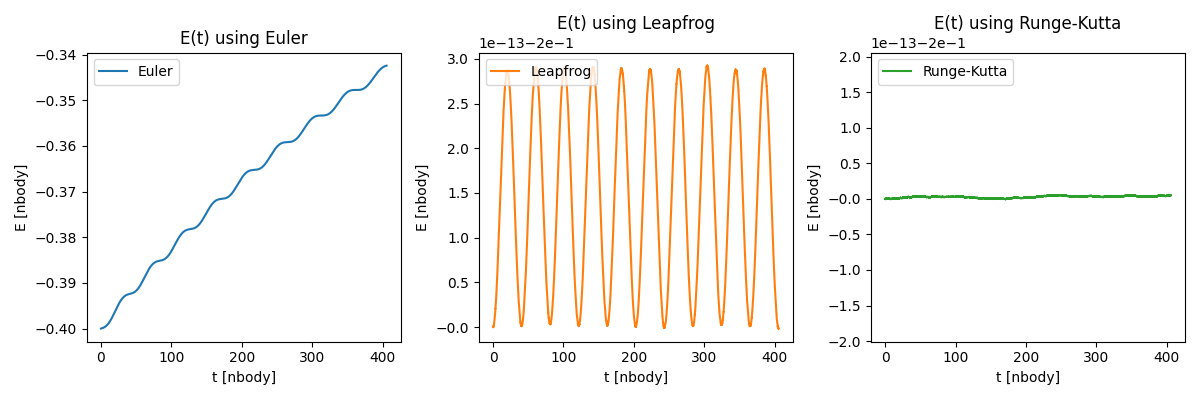

In [15]:
plt.figure(figsize=(12,4))

#PLOT Euler
plt.subplot(1,3,1)
plt.title('E(t) using Euler')
plt.plot(time_euler, Etot_euler, label='Euler', color='C0')
plt.xlabel('t [nbody]')
plt.ylabel('E [nbody]')
plt.legend(loc='upper left')

#PLOT Leapfrog
plt.subplot(1,3,2)
plt.title('E(t) using Leapfrog')
plt.plot(time_leapfrog, Etot_leapfrog, label='Leapfrog', color='C1')
plt.xlabel('t [nbody]')
plt.ylabel('E [nbody]')
plt.legend(loc='upper left')

#PLOT Runge-Kutta
plt.subplot(1,3,3)
plt.title('E(t) using Runge-Kutta')
plt.plot(time_rungekutta, Etot_rungekutta, label='Runge-Kutta', color='C2')
plt.xlabel('t [nbody]')
plt.ylabel('E [nbody]')
#plt.ylim(-0.172, -0.171)
#plt.ylim(bottom=-100)
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

From here we can see that:
1) For the Euler method, the energy increases as the time passes. This is in line with theoretical expectations, but is not in line with the physical situation. Infact, the system as we created it is conservative; therefore the energy should be constant in time. We can also note that as $t$ increases, the energy tends to zero. this is coherent with what we said before: as time passes, the two bodies (as described by this integrator) will get further apart until they become independent. In fact, $r \rightarrow \infty \implies E_{pot} = - \frac{G M}{R} \rightarrow 0$.
2) Regarding the Leapfrog method, The energy varies almost sinusoidally on time. In particular, the energy is minimum at the pericenter, and maximum at the apocenter. The figure shows 10 crests, corrisponding to the 10 periods over which we are integrating. The mean energy remains anyway constant, as expected. Once again, we can notice the symplectic nature of this integrator.
3) For the Runge-Kutta method, the energy is constant in time. This reflects the very high precision of this method. 

Now, we make a comparison between these three methods. First we compare them as they are, and then we use a logaritmic scale. 

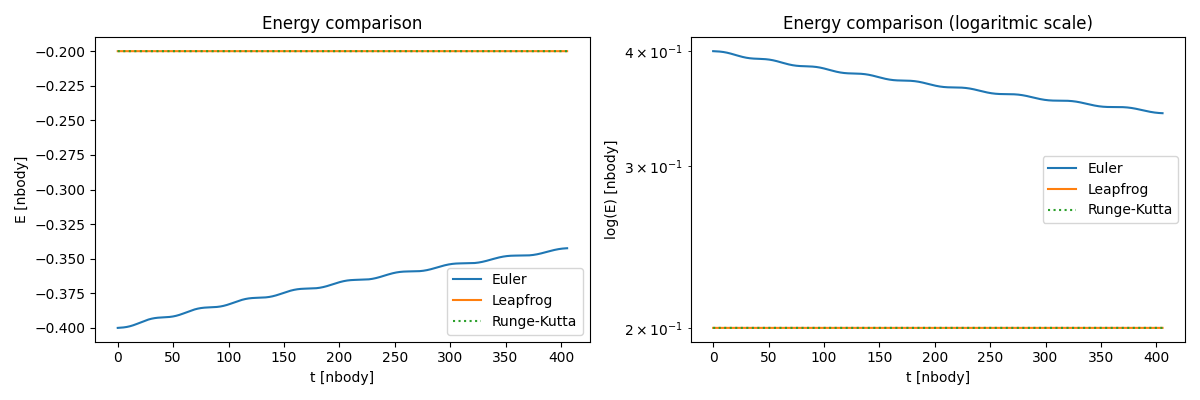

In [16]:
#PLOT Energy comparison 
plt.figure(figsize=(12,4))

#PLOT non logaritmically
plt.subplot(1,2,1)
plt.title('Energy comparison')
plt.plot(time_euler,        Etot_euler,         label='Euler',          color='C0')
plt.plot(time_leapfrog,     Etot_leapfrog,      label='Leapfrog',       color='C1')
plt.plot(time_rungekutta,   Etot_rungekutta,    label='Runge-Kutta',    color='C2', linestyle='dotted')
plt.xlabel('t [nbody]')
plt.ylabel('E [nbody]')
plt.legend()

#PLOT logaritmically
plt.subplot(1,2,2)
plt.title('Energy comparison (logaritmic scale)')
plt.plot(time_euler,        abs(Etot_euler),        label='Euler',      color='C0')
plt.plot(time_leapfrog,     abs(Etot_leapfrog),     label='Leapfrog',   color='C1')
plt.plot(time_rungekutta,   abs(Etot_rungekutta),   label='Runge-Kutta',color='C2', linestyle='dotted')
plt.xlabel('t [nbody]')
plt.ylabel('log(E) [nbody]')
plt.yscale('log')
plt.legend()

plt.tight_layout()
plt.show()


From this figures it emerges that in both scales the energy of the Leapfrog and of the Runge-Kutta method are constant with respect to the one of the Euler method, as expected and as already commented.

### Summary

The results found before are in line with the theoretical expectations. 
In fact, the precision of the integration methods increases from the Euler (least precise), passing through the Leapfrog, and arriving to the Runge Kutta (most precise), as we discussed before.

Concerning the energy, things seem to work. In fact, the curves of the relative energies are totally in accordance with what seen at lecture. In particular, The largest error on the energy is the one relative to the Euler method (up to $10^{-1}$ in our case); for the Leapfrog we have instead a maximum of $10^{-8}$ and for the Runge-Kutta a maximum of $10^{-13}$.

<div class='alert alert-block alert-warning'>
Non ho idea di cosa voglia dire questa cosa
</div>


## Benchmark with different timesteps
Now we have to redo all the three integrations using different timesteps.

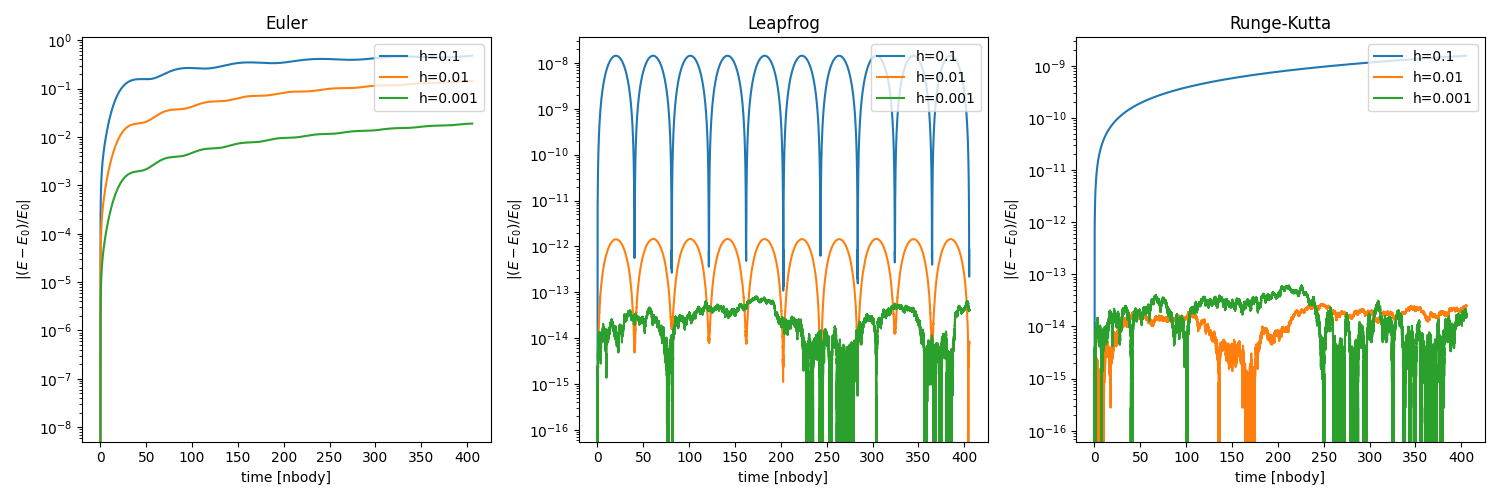

In [17]:
tstep = [0.1, 0.01, 0.001]

plt.figure(figsize=(15,5))

for tstep in tstep:
    part_euler = part.copy()
    path1_euler, path2_euler, Etot_euler, Ekin_euler, Epot_euler = integration_euler(part_euler, tstep, tsimulation, t, N)
    energy_error_euler, time_euler = total_energy_error(Etot_euler, t, tsimulation, tstep)

    plt.subplot(1,3,1)
    plt.plot(time_euler, energy_error_euler, label=f'h={tstep}')
    plt.yscale('log')
    plt.xlabel('time [nbody]')
    plt.ylabel(f'$|(E-E_0)/E_0|$')
    plt.title('Euler')
    plt.legend(loc='upper right')

    part_leapfrog = part.copy()
    path1_leapfrog, path2_leapfrog, Etot_leapfrog, Ekin_leapfrog, Epot_leapfrog = integration_leapfrog(part_leapfrog, tstep, tsimulation, t, N)
    energy_error_leapfrog, time_leapfrog = total_energy_error(Etot_leapfrog, t, tsimulation, tstep)

    plt.subplot(1,3,2)
    plt.plot(time_leapfrog, energy_error_leapfrog, label=f'h={tstep}')
    plt.yscale('log')
    plt.xlabel('time [nbody]')
    plt.ylabel(f'$|(E-E_0)/E_0|$')
    plt.title('Leapfrog')
    plt.legend(loc='upper right')

    part_rungekutta = part.copy()
    path1_rungekutta, path2_rungekutta, Etot_rungekutta, Ekin_rungekutta, Epot_rungekutta = integration_rungekutta(part_rungekutta, tstep, tsimulation, t, N)
    energy_error_rungekutta, time_rungekutta = total_energy_error(Etot_rungekutta, t, tsimulation, tstep)

    plt.subplot(1,3,3)
    plt.plot(time_rungekutta, energy_error_rungekutta, label=f'h={tstep}')
    plt.yscale('log')
    plt.xlabel('time [nbody]')
    plt.ylabel(f'$|(E-E_0)/E_0|$')
    plt.title('Runge-Kutta')
    plt.legend(loc='upper right')

    plt.tight_layout()
    
    


### Comments
The plots above show how the energy error varies as function of the timestep. The results are in line with the theoretical expectation. In fact, the energy error decreases as the timestep increases, with the sole exception of the Runge-Kutta method: In this case, while we have a difference of 4 orders of magnitude (the position error goes like $O(h^4)$ as already commented) between $h=0.1$ and $h=0.01$, for $h=0.01$ and $h=0.001$ we hit the machine precision, leading to a messy plot that cannot be improved without specific procedures. The machine precision is hitted also in the leapfrog method with $h=0.001$.


## Animation 
Let's make an animation of one of our systems. Due to the long running time of this part of the script we commented it. If you want to run it delete the comments.

In [18]:
import matplotlib.animation as anim

In [19]:
'''
path_length = len(path1_euler)
subsample = 100

time = time_euler[::subsample]

x1 = path1_euler[::subsample, 0]
y1 = path1_euler[::subsample, 1]
x2 = path2_euler[::subsample, 0]
y2 = path2_euler[::subsample, 1]

fig, ax = plt.subplots()


traj_1, = ax.plot([], [], label=f'$M_1$', color = 'red')  
traj_2, = ax.plot([], [], label=f'$M_2$', color = 'blue')
time_template = 'time = %.1f [nbody]'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

ax.set_xlim(min(min(x1),min(x2))-1, max(max(x1),max(x2))+1)
ax.set_ylim(min(min(y1),min(y2))-1, max(max(y1),max(y2))+1)


def animate(i):
    traj_1.set_data(x1[:i], y1[:i])  # Update the data for trajectory 1
    traj_2.set_data(x2[:i], y2[:i])  # Update the data for trajectory 2
    time_text.set_text(time_template % (time[i-1]))

    return traj_1, traj_2, time_text

frames = int(np.ceil(path_length / subsample))
animation = anim.FuncAnimation(fig, animate, frames=frames, blit=True)

plt.title('Integration with Euler')
plt.xlabel('X [nbody]')
plt.ylabel('Y [nbody]')
plt.legend()  
animation.save('evolution_circular_euler.gif', writer = 'pillow', fps = 60)
'''

"\npath_length = len(path1_euler)\nsubsample = 100\n\ntime = time_euler[::subsample]\n\nx1 = path1_euler[::subsample, 0]\ny1 = path1_euler[::subsample, 1]\nx2 = path2_euler[::subsample, 0]\ny2 = path2_euler[::subsample, 1]\n\nfig, ax = plt.subplots()\n\n\ntraj_1, = ax.plot([], [], label=f'$M_1$', color = 'red')  \ntraj_2, = ax.plot([], [], label=f'$M_2$', color = 'blue')\ntime_template = 'time = %.1f [nbody]'\ntime_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)\n\nax.set_xlim(min(min(x1),min(x2))-1, max(max(x1),max(x2))+1)\nax.set_ylim(min(min(y1),min(y2))-1, max(max(y1),max(y2))+1)\n\n\ndef animate(i):\n    traj_1.set_data(x1[:i], y1[:i])  # Update the data for trajectory 1\n    traj_2.set_data(x2[:i], y2[:i])  # Update the data for trajectory 2\n    time_text.set_text(time_template % (time[i-1]))\n\n    return traj_1, traj_2, time_text\n\nframes = int(np.ceil(path_length / subsample))\nanimation = anim.FuncAnimation(fig, animate, frames=frames, blit=True)\n\nplt.title('Integra